/media/farnoosh/LMU/nextcloud/jupyternotebooks/erosita_DR1/completeness.py:60: RuntimeWarning: invalid value encountered in divide
  return np.cumsum(number_of_obj_small_survey)/np.cumsum(number_of_obj_big_survey)
/media/farnoosh/LMU/nextcloud/jupyternotebooks/erosita_DR1/completeness.py:60: RuntimeWarning: invalid value encountered in divide
  return np.cumsum(number_of_obj_small_survey)/np.cumsum(number_of_obj_big_survey)
/media/farnoosh/LMU/nextcloud/jupyternotebooks/erosita_DR1/completeness.py:60: RuntimeWarning: invalid value encountered in divide
  return np.cumsum(number_of_obj_small_survey)/np.cumsum(number_of_obj_big_survey)
/media/farnoosh/LMU/nextcloud/jupyternotebooks/erosita_DR1/completeness.py:60: RuntimeWarning: invalid value encountered in divide
  return np.cumsum(number_of_obj_small_survey)/np.cumsum(number_of_obj_big_survey)


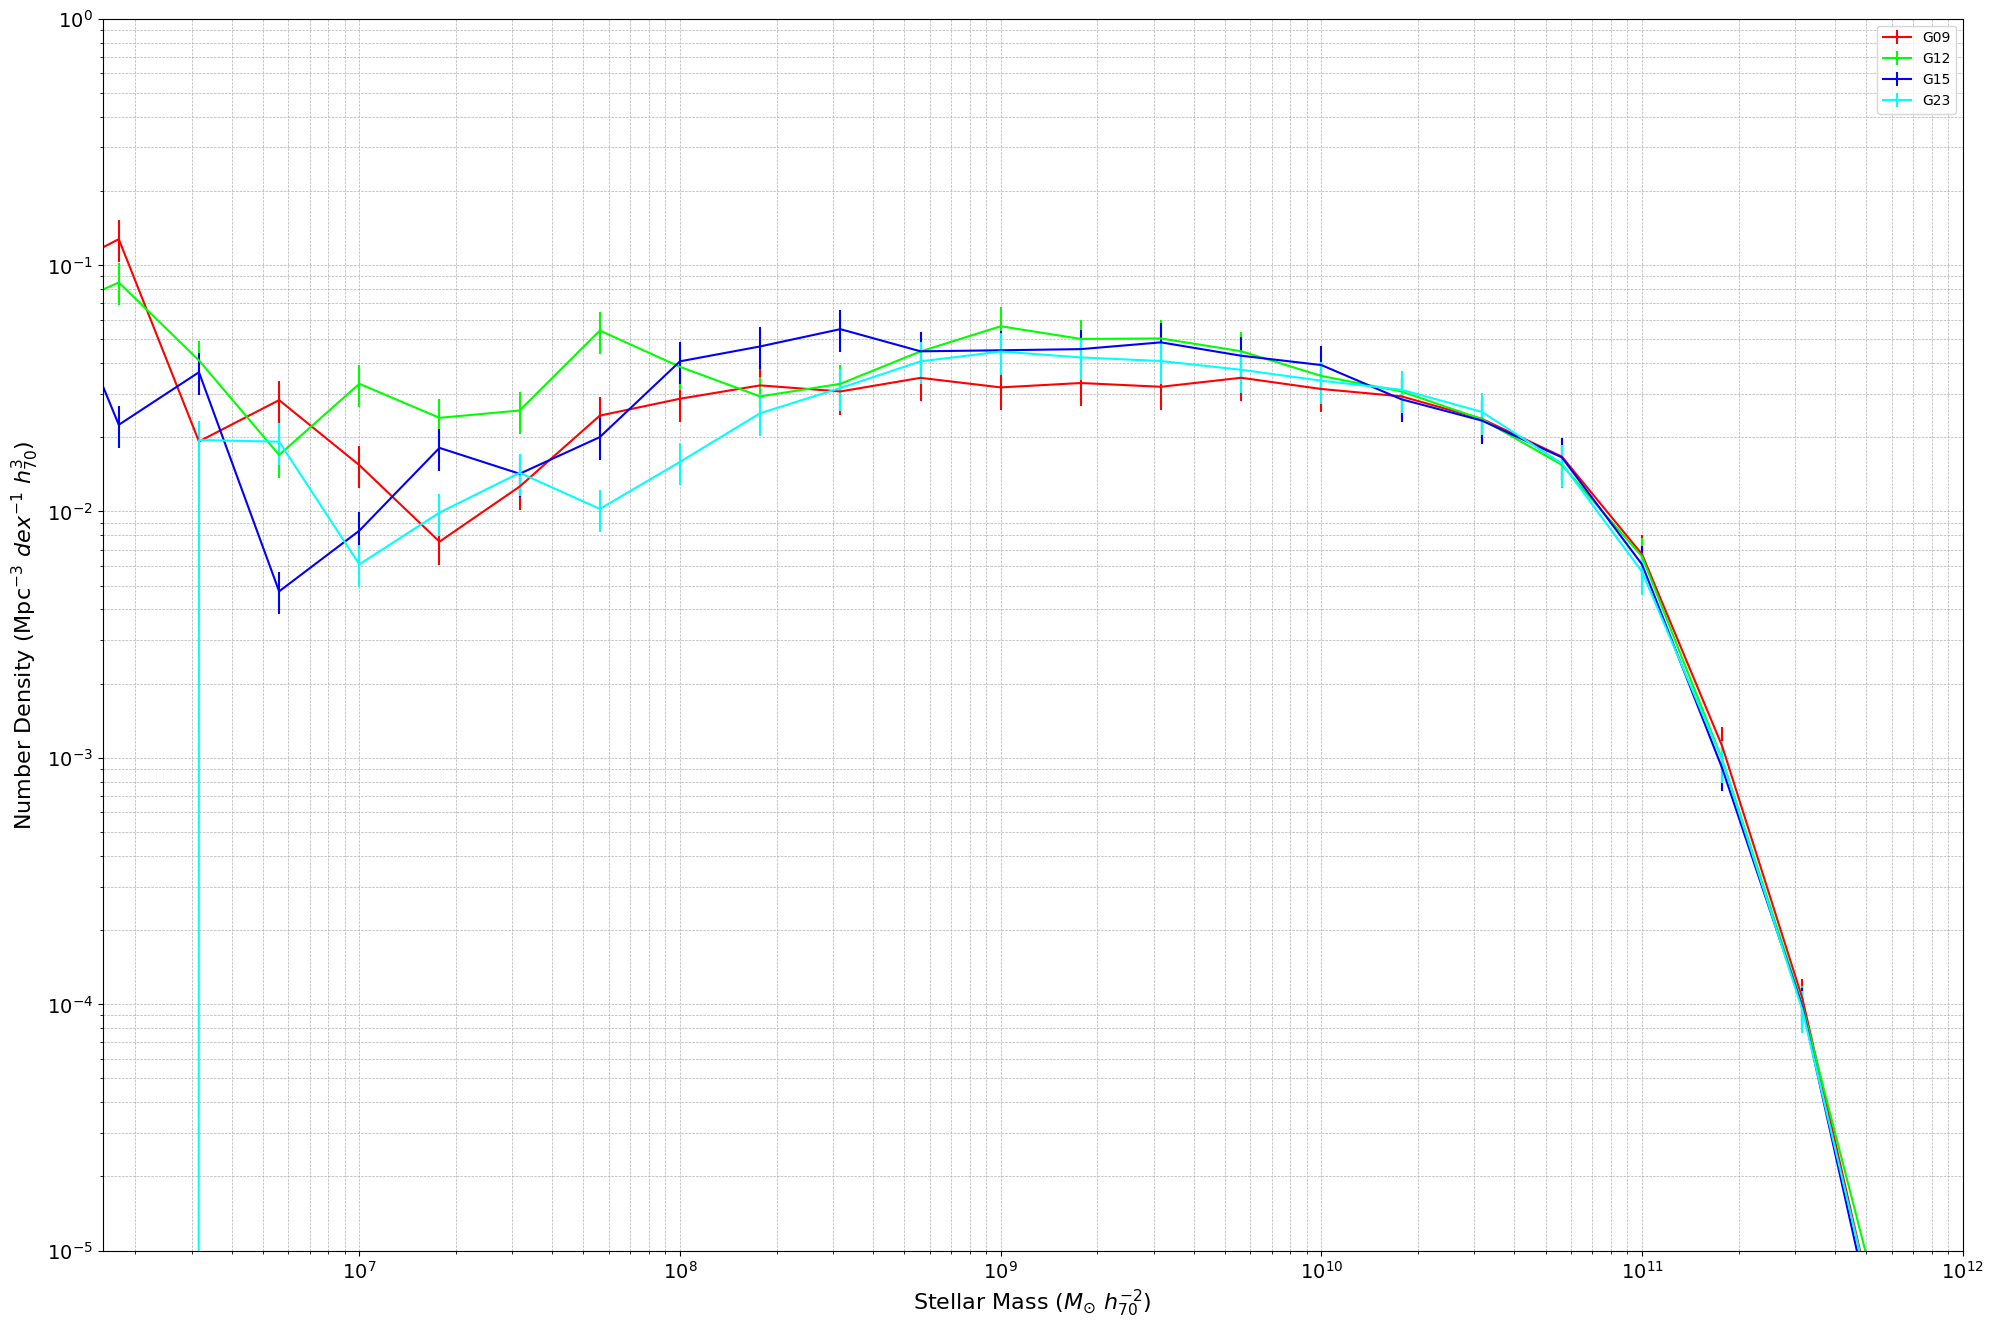

In [1]:
from galaxy_cluster_matching import *
from test_mass_func import *

In [3]:
# Loading the data

galaxy_SpecMass_catalog_raw = fits.open('/home/farnoosh/farnoosh/Master_Thesis_all/Data/GAMA/merged/StellarMass-gkvScience/mergedStellarMass-gkvScience')[1].data  # galaxies
# galaxy_SpecMass_catalog_raw = fits.open('/home/farnoosh/Desktop/merge_gkvScience_StellarMass_allObjectsfromBoth')[1].data  # galaxies
clusters_raw = fits.open('/home/farnoosh/farnoosh/Master_Thesis_all/Data/eFEDS/Mathias_Klug/efeds_members.fit')[1].data  # clusters
print('number of galaxies: ', len(galaxy_SpecMass_catalog_raw))
print('number of the clusters: ', len(clusters_raw))

number of galaxies:  370116
number of the clusters:  542


In [4]:
# Masks
# todo: CHANGE THE MASKS, AND DATAFRAMES, SINCE THE COLUMN NAMES ARE DIFFERENT
cluster_mask = (
        ~np.isnan(clusters_raw['VDISP']) &  # mask clusters which don't have VDISP values
        (clusters_raw['RA'] > 128.5007) &
        (clusters_raw['RA'] < 141.5) &
        (clusters_raw['DEC'] > -2.05) &
        (clusters_raw['DEC'] < 3.02)
)

galaxy_mask = (
        (galaxy_SpecMass_catalog_raw['uberclass'] == 1) &  # classified as galaxy
        # (galaxy_SpecMass_catalog_raw['duplicate'] == False) &
        # (galaxy_SpecMass_catalog_raw['mask'] == False) &
        # (galaxy_SpecMass_catalog_raw['NQ'] > 2) & #confidently measured redshift
        # (galaxy_SpecMass_catalog_raw['SC'] > 3) &
        (galaxy_SpecMass_catalog_raw['mstar'] > 0) &
        # (galaxy_SpecMass_catalog_raw['starmask'] == False) &
        (galaxy_SpecMass_catalog_raw['Z'] < 0.7) &
        (galaxy_SpecMass_catalog_raw['RAcen'] > 128.4) &
        (galaxy_SpecMass_catalog_raw['RAcen'] < 145.0) &
        (galaxy_SpecMass_catalog_raw['Deccen'] > -2.6) &
        (galaxy_SpecMass_catalog_raw['Deccen'] < 5.7)
)

galaxy_catalog = galaxy_SpecMass_catalog_raw[galaxy_mask]
cluster_catalog = clusters_raw[cluster_mask]
print('number of the galaxies after masking: ', len(galaxy_catalog))
print('number of the clusters after masking: ', len(cluster_catalog))

number of the galaxies after masking:  81015
number of the clusters after masking:  162


In [ ]:
'''
"full_mass_completeness_dataframe"

is from the mass function part, with masks below it has 147150 number of objects:
MASS_HISTOGRAM_MASKS = (galaxy_SpecMass_catalog_raw['uberclass'] == 1 ) &  # galaxy
    (['duplicate'] == 0) &   # unique object
    (['mask'] == False) &
    (['starmask'] == False) &
    (['mstar'] > 0) &
    (['mstar'] < 10**14) &
    (['NQ'] > 2) &
    (['SC'] > 7) &      # 95% redshift completeness limit
    (['Z'] != 0) &
    (['Z'] <0.4) &     # z_max= 0.1 ~ 430 Mpc
    (['flux_rt'] >= 5.011928e-05)   # maximum magnitude of 19.65 in r-band
mass_histogram_Masked_cat_from_SpecMass = galaxy_SpecMass_catalog_raw[MASS_HISTOGRAM_MASKS]

In the end it has these columns:
uberID      RA      DEC       mstar      z       comovingdist       completeness        region 

35404 object are in G09.
'''

In [7]:
# Dataframes
cluster_df = pd.DataFrame({
    'c_ID': cluster_catalog['ID-SRC'].byteswap().newbyteorder(),
    'c_NAME': cluster_catalog['NAME'].byteswap().newbyteorder(),
    'RA': cluster_catalog['RA'].byteswap().newbyteorder(),
    'DEC': cluster_catalog['DEC'].byteswap().newbyteorder(),
    'z': cluster_catalog['ZBEST'].byteswap().newbyteorder(),
    'cluster_radius_Mpc': cluster_catalog['R_LAMBDA'].byteswap().newbyteorder(),
    'cluster_Velocity_Dispersion': cluster_catalog['VDISP'].byteswap().newbyteorder(),
    'VDISP_error': cluster_catalog['VDISP_ERR'].byteswap().newbyteorder()
})






'''IMPORTAAAAAAAAAAAAAAAAAAAAAAAAANT: I changed this from galaxy_df to galaxy_df_original to see what can happen with using the galaxy datafram from the mass fucntion file. 
Because i think i should use the same galaxy data fram that i made from mass fucntion file (based on richard-curve and completeness)


khob fek konam inja bayad baraye hamin un ghabli dataframe, ghesmate "completeness ro anjam bedim ta comleteness dashte bashe.
'''

# Creating the galaxy DataFrame and merging with mass data 
galaxy_df = pd.DataFrame({
        'uberID': galaxy_catalog['uberID'].byteswap().newbyteorder(),
        'RA': galaxy_catalog['RAcen'].byteswap().newbyteorder(),
        'DEC': galaxy_catalog['Deccen'].byteswap().newbyteorder(),
        'z': galaxy_catalog['Z'].byteswap().newbyteorder(),
        'mstar': galaxy_catalog['mstar'].byteswap().newbyteorder()
})

print(galaxy_df)

                uberID          RA       DEC        z         mstar
0      138021052006945  137.992346  2.570577  0.21327  3.294812e+10
1      131010293406270  131.307189  1.507075  0.20730  1.506049e+10
2      136000563202354  136.053008  0.138277  0.27538  5.989433e+10
3      130020205007803  130.790764  2.651356  0.29370  9.169161e+10
4      131990500011804  132.112483  0.028110  0.56853  2.737705e+11
...                ...         ...       ...      ...           ...
81010  137000578500957  137.038659  0.006791  0.09422  1.637729e+10
81011  135000832810514  134.799377  0.906732  0.02531  9.149594e+07
81012  140000362709494  140.241766  0.810503  0.02381  1.054762e+08
81013  137021074202062  136.971637  2.110832  0.27823  6.388143e+10
81014  132990912404755  132.723731 -0.636885  0.01503  7.109373e+07

[81015 rows x 5 columns]


In [9]:
# Initialize a list to hold region assignments
regions = []

# Determine regions for each galaxy
for i, galaxy in galaxy_df.iterrows():
    assigned_region = None
    for region_name, region_params in REGIONS_OF_SKY.items():
        if (region_params['RA'][0] <= galaxy['RA'] <= region_params['RA'][1] and
                region_params['DEC'][0] <= galaxy['DEC'] <= region_params['DEC'][1]):
            assigned_region = region_name
            break
    regions.append(assigned_region)

# Add the region column to the DataFrame
galaxy_df['region'] = regions

# Filter out galaxies that don't belong to any region
galaxy_df = galaxy_df.dropna(subset=['region'])

# Initialize a DataFrame to hold completeness information
completeness_all_df = pd.DataFrame()

# Loop over regions and create completeness DataFrames
for region_name in REGIONS_OF_SKY.keys():
    completeness_region_df = create_completeness_dataframe(
        big_survey=galaxy_df,
        small_survey=galaxy_df[galaxy_df['region'] == region_name],
        flux_type='flux_rt',
        region=region_name
    )
    completeness_region_df['region'] = region_name
    completeness_all_df = pd.concat([completeness_all_df, completeness_region_df], ignore_index=True)

# Merge completeness data back into the galaxy_list
galaxy_df_with_completeness = pd.merge(galaxy_df, completeness_all_df, on='uberID', how='left')

# Display the updated DataFrame
print(galaxy_df_with_completeness)


KeyError: 'RA'

In [5]:
galaxy_df_old = full_mass_completeness_dataframe
print(galaxy_df_old)
'''
from 147150 objects that are in all regions, 35404 of them are in G09.
'''

                 uberID          RA        DEC         mstar        z  \
0       138021052006945  137.992346   2.570577  3.294812e+10  0.21327   
1       345690124605004  346.545447 -31.310967  1.752448e+11  0.23777   
2       341690300008314  342.851034 -31.000032  1.087142e+10  0.07866   
3       130020205007803  130.790764   2.651356  9.169161e+10  0.29370   
4       341690300608026  342.850445 -31.027130  1.122824e+10  0.12494   
...                 ...         ...        ...           ...      ...   
147146  135000832810514  134.799377   0.906732  9.149594e+07  0.02531   
147147  222980880703442  222.753969  -1.759161  1.659049e+10  0.20127   
147148  215020496300092  214.716076   1.925282  6.915294e+10  0.26861   
147149  140000362709494  140.241766   0.810503  1.054762e+08  0.02381   
147150  137021074202062  136.971637   2.110832  6.388143e+10  0.27823   

        comovingdist  completeness region  
0         872.932800      0.586692    G09  
1         957.263672      0.671017 

In [6]:
matched_galaxy_dataframe = match_galaxies_and_clusters(galaxy_dataframe=galaxy_df, cluster_dataframe=cluster_df)

Progress: 99.99932042595701%%%%%

In [7]:
print(matched_galaxy_dataframe[matched_galaxy_dataframe['environment'] != 'Field'])


                 uberID          RA       DEC         mstar        z  \
14      130990151906125  131.440319 -0.506608  4.314327e+10  0.15497   
331     130990156606252  131.435755 -0.494546  5.403739e+10  0.15614   
364     133990088904009  134.499717 -0.705824  1.333348e+11  0.24617   
391     130990157106322  131.435501 -0.488441  2.071739e+11  0.15490   
665     140000378608701  140.226808  0.735989  5.193279e+10  0.15789   
...                 ...         ...       ...           ...      ...   
146138  130990136705562  131.454678 -0.559571  7.305416e+10  0.15442   
146217  132020164006107  132.829446  2.491626  1.678701e+11  0.38500   
146371  136991087411411  136.559441 -0.008810  2.609679e+11  0.19930   
146973  130990148605975  131.443428 -0.520688  1.090748e+11  0.15834   
147041  130990149606322  131.442491 -0.487985  9.183464e+10  0.15737   

        comovingdist  completeness region    environment cluster_mass  \
14        644.425476      0.633141    G09  ClusterMember      

In [8]:
"""
matched galaxy data frame has uberID, RA, DEC, z, and environment (field or withing a cluster)
then separately we get the completeness for the mass of all the galaxies and merge it with the dataframe we have here
the dataframe will have: uberID, RA, DEC, z, Environment, completeness
we need to add the region (here, 9) for each galaxy into the galaxy_dataframe columns
matched_galaxy_dataframe['region'] = 'G09'
then i feed all these columns as the input into mass_function:
mass_function_for_filed, mass_histogram_error_filed = get_weighted_mass_histogram(input_mass_completeness_dataframe=matched_galaxy_dataframe[matched_galaxy_dataframe['environment']=='field'], region_name= 'G09')
mass_function_for_within_clusters, mass_histogram_error_cluster = get_weighted_mass_histogram(input_mass_completeness_dataframe=matched_galaxy_dataframe[matched_galaxy_dataframe['environment']!='field'], region_name= 'G09')

then do the plotting
""" 

"\nmatched galaxy data frame has uberID, RA, DEC, z, and environment (field or withing a cluster)\nthen separately we get the completeness for the mass of all the galaxies and merge it with the dataframe we have here\nthe dataframe will have: uberID, RA, DEC, z, Environment, completeness\nwe need to add the region (here, 9) for each galaxy into the galaxy_dataframe columns\nmatched_galaxy_dataframe['region'] = 'G09'\nthen i feed all these columns as the input into mass_function:\nmass_function_for_filed, mass_histogram_error_filed = get_weighted_mass_histogram(input_mass_completeness_dataframe=matched_galaxy_dataframe[matched_galaxy_dataframe['environment']=='field'], region_name= 'G09')\nmass_function_for_within_clusters, mass_histogram_error_cluster = get_weighted_mass_histogram(input_mass_completeness_dataframe=matched_galaxy_dataframe[matched_galaxy_dataframe['environment']!='field'], region_name= 'G09')\n\nthen do the plotting\n"

In [9]:

# Find the clusters that have galaxies among them
unique_cluster_ids = matched_galaxy_dataframe['cluster_name'].unique()

# Print the clusters and their galaxies
cluster_galaxies = matched_galaxy_dataframe.groupby('cluster_name')['uberID'].apply(list).reset_index()
cluster_galaxies['num_galaxies'] = cluster_galaxies['uberID'].apply(len)

# Print the clusters with galaxies
for index, row in cluster_galaxies.iterrows():
    print(f"Cluster {row['cluster_name']} has the following {len(row['uberID'])} galaxies within: {row['uberID']}")

Cluster eFEDSJ083651.3+030002 has the following 2 galaxies within: [129020867111101, 129020874611193]
Cluster eFEDSJ083654.6+025954 has the following 16 galaxies within: [129020754611149, 129020765311309, 129020773010920, 129020778211401, 129020789011021, 129020798811315, 129020805311478, 129020809511497, 129020813311435, 129020814211457, 129020818111167, 129020818710946, 129020830411303, 129020837511203, 129020843911386, 129020864311407]
Cluster eFEDSJ083723.6+012413 has the following 2 galaxies within: [129010249405188, 129010251405245]
Cluster eFEDSJ083807.6+002501 has the following 6 galaxies within: [129000030605704, 129000034306108, 129000062305810, 130001047205365, 130001073105548, 130001116905236]
Cluster eFEDSJ083857.5+020846 has the following 1 galaxies within: [129020288502277]
Cluster eFEDSJ083858.5-015032 has the following 3 galaxies within: [129980836802339, 129980851502190, 129980892302446]
Cluster eFEDSJ083859.3+022841 has the following 3 galaxies within: [1290202399058

In [10]:
# Find the maximum number of galaxies in a cluster
max_galaxies_row = cluster_galaxies.loc[cluster_galaxies['num_galaxies'].idxmax()]
print(f"Cluster {max_galaxies_row['cluster_name']} has the maximum number of galaxies: {max_galaxies_row['num_galaxies']}")

# Count the number of clusters with only one galaxy within them
clusters_with_one_galaxy = sum(cluster_galaxies['num_galaxies'] == 1)
print(f"Number of clusters with only one galaxy: {clusters_with_one_galaxy}")

Cluster eFEDSJ085027.8+001503 has the maximum number of galaxies: 48
Number of clusters with only one galaxy: 7


In [11]:
# Calculate the total number of galaxies within clusters
total_galaxies = cluster_galaxies['num_galaxies'].sum()
print(f"Total number of galaxies within clusters: {total_galaxies}")

Total number of galaxies within clusters: 775


In [14]:
# Find clusters with no galaxies
all_cluster_names = cluster_df['c_NAME'].unique()
clusters_with_galaxies = matched_galaxy_dataframe['cluster_name'].dropna().unique()
clusters_without_galaxies = np.setdiff1d(all_cluster_names, clusters_with_galaxies)

print(len(clusters_with_galaxies))
print("Clusters with no galaxies within:", len(clusters_without_galaxies))
for cluster_name in clusters_without_galaxies:
    print(f"Cluster name: {cluster_name}")

88
Clusters with no galaxies within: 74
Cluster name: eFEDSJ083503.2+010756
Cluster name: eFEDSJ083759.5-003643
Cluster name: eFEDSJ083802.9+015626
Cluster name: eFEDSJ083806.9-003600
Cluster name: eFEDSJ083834.1+020643
Cluster name: eFEDSJ083900.6+020057
Cluster name: eFEDSJ083903.5-011454
Cluster name: eFEDSJ083937.8+014631
Cluster name: eFEDSJ084006.1+025913
Cluster name: eFEDSJ084021.6+020132
Cluster name: eFEDSJ084051.7+014122
Cluster name: eFEDSJ084129.0+002645
Cluster name: eFEDSJ084135.0+010150
Cluster name: eFEDSJ084151.7+004351
Cluster name: eFEDSJ084220.9+013844
Cluster name: eFEDSJ084246.9-000917
Cluster name: eFEDSJ084324.2-001438
Cluster name: eFEDSJ084454.0+010021
Cluster name: eFEDSJ084459.2-011902
Cluster name: eFEDSJ084501.0+012728
Cluster name: eFEDSJ084545.2+005535
Cluster name: eFEDSJ084637.1-002256
Cluster name: eFEDSJ084649.0+004946
Cluster name: eFEDSJ084833.2-012216
Cluster name: eFEDSJ084905.3+021435
Cluster name: eFEDSJ084939.6-005126
Cluster name: eFEDSJ0850

In [13]:
print(1-44/162)


0.7283950617283951
